# Лабораторна робота №4

In [6]:
%pip install opencv-python matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('rose.png')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

## 1. Фільтр з ядром Гауса

## $$G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

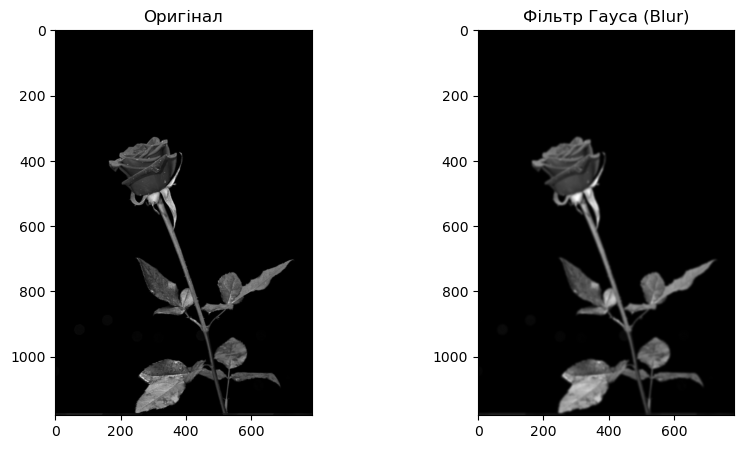

In [3]:
gaussian_blur = cv2.GaussianBlur(img_gray, (15, 15), 0)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_gray, cmap='gray'), plt.title('Оригінал')
plt.subplot(122), plt.imshow(gaussian_blur, cmap='gray'), plt.title('Фільтр Гауса (Blur)')
plt.show()

## 2. Зашумлення зображення (Нормальний шум)

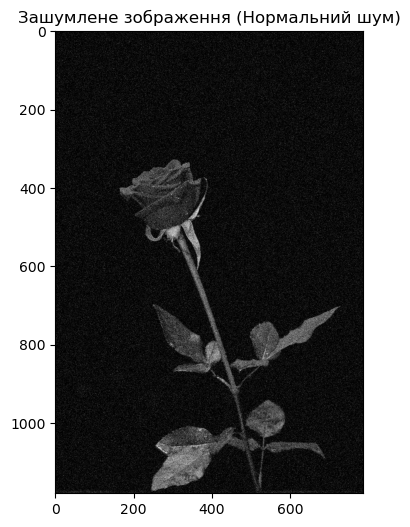

In [5]:
def add_gaussian_noise(image, mean=0, sigma=25):

    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    gauss = gauss.reshape(row, col)
    
    noisy = image.astype(np.float32) + gauss
    
    noisy = np.clip(noisy, 0, 255)
    
    return noisy.astype(np.uint8)

img_noisy = add_gaussian_noise(img_gray, mean=0, sigma=30)

plt.figure(figsize=(6, 6))
plt.imshow(img_noisy, cmap='gray')
plt.title('Зашумлене зображення (Нормальний шум)')
plt.show()

## 3. Порівняння Медіанного та Гаусового фільтрів

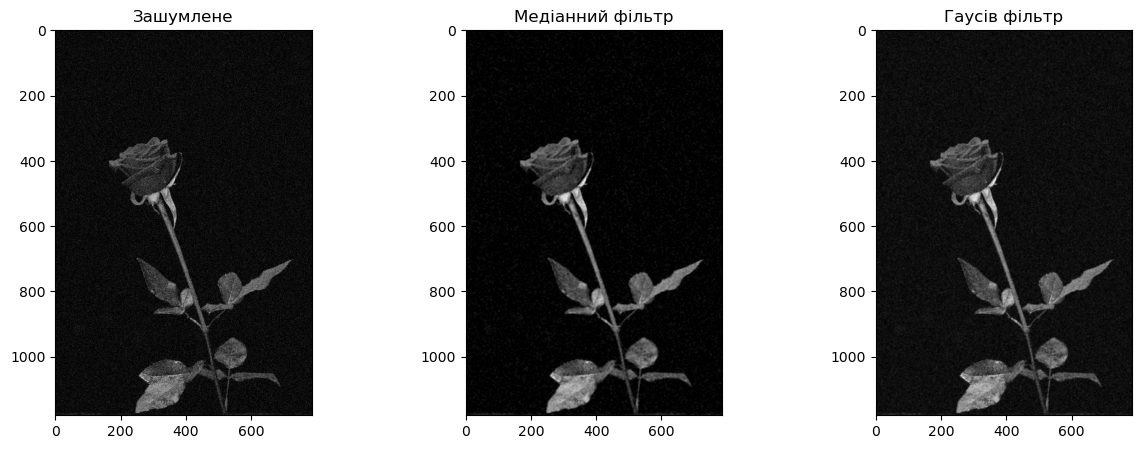

Висновок: Медіанний фільтр краще зберіг краї пелюсток,
але Гаусів фільтр зробив зображення більш 'м'яким'.


In [6]:
median_filtered = cv2.medianBlur(img_noisy, 5)

gaussian_filtered_noise = cv2.GaussianBlur(img_noisy, (5, 5), 0)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img_noisy, cmap='gray'), plt.title('Зашумлене')
plt.subplot(132), plt.imshow(median_filtered, cmap='gray'), plt.title('Медіанний фільтр')
plt.subplot(133), plt.imshow(gaussian_filtered_noise, cmap='gray'), plt.title('Гаусів фільтр')
plt.show()

print("Висновок: Медіанний фільтр краще зберіг краї пелюсток,")
print("але Гаусів фільтр зробив зображення більш 'м'яким'.")

## 4. Двосторонній фільтр (Bilateral Filter)

## $$I_{filtered}(x) = \frac{1}{W_p} \sum_{x_i \in \Omega} I(x_i) f_r(||I(x_i) - I(x)||) g_s(||x_i - x||)$$

## Де: <br>
### $g_s$ — просторова вага (Гаус по відстані). <br>
### $f_r$ — вага по інтенсивності (Гаус по різниці кольору). <br>
### $W_p$ — нормалізуючий коефіцієнт. <br>

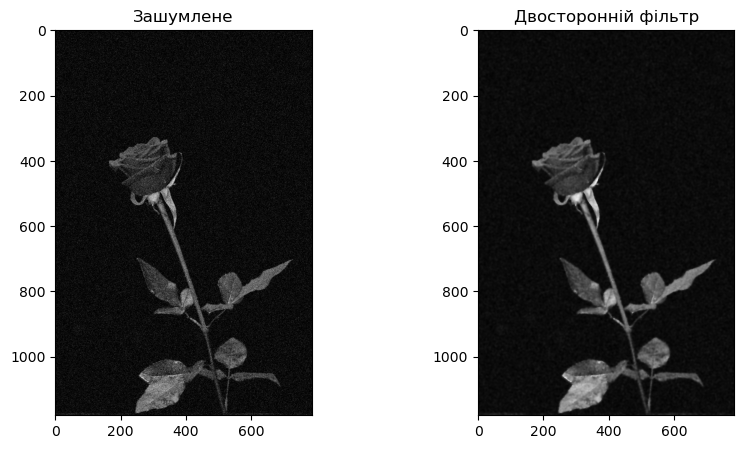

In [7]:
bilateral_filtered = cv2.bilateralFilter(img_noisy, d=9, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_noisy, cmap='gray'), plt.title('Зашумлене')
plt.subplot(122), plt.imshow(bilateral_filtered, cmap='gray'), plt.title('Двосторонній фільтр')
plt.show()

## 5. Універсальна процедура фільтрації

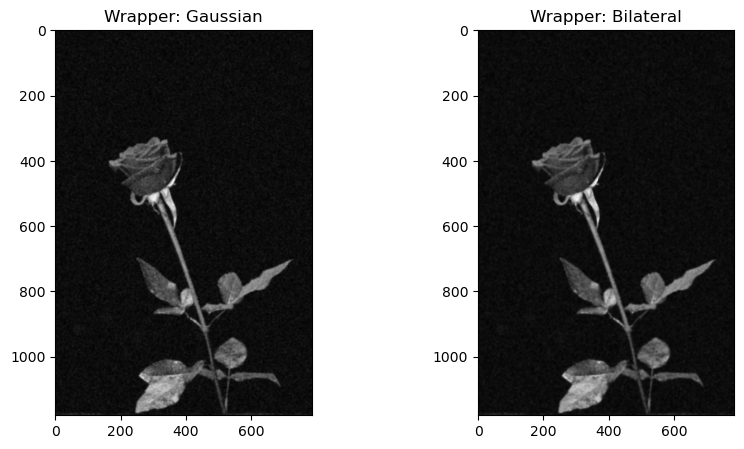

In [8]:
def apply_lowpass_filter(image, method='gaussian', ksize=5, **kwargs):

    if method == 'box':
        return cv2.blur(image, (ksize, ksize))
    
    elif method == 'gaussian':
        sigma = kwargs.get('sigma', 0)
        return cv2.GaussianBlur(image, (ksize, ksize), sigma)
    
    elif method == 'median':
        if ksize % 2 == 0: ksize += 1
        return cv2.medianBlur(image, ksize)
    
    elif method == 'bilateral':
        sigmaColor = kwargs.get('sigmaColor', 75)
        sigmaSpace = kwargs.get('sigmaSpace', 75)
        return cv2.bilateralFilter(image, ksize, sigmaColor, sigmaSpace)
    
    else:
        print("Невідомий метод!")
        return image

res_gauss = apply_lowpass_filter(img_noisy, method='gaussian', ksize=9)
res_bilat = apply_lowpass_filter(img_noisy, method='bilateral', ksize=9, sigmaColor=100, sigmaSpace=100)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(res_gauss, cmap='gray'), plt.title('Wrapper: Gaussian')
plt.subplot(122), plt.imshow(res_bilat, cmap='gray'), plt.title('Wrapper: Bilateral')
plt.show()

# Контрольні питання

## 1

## У чому полягає сенс градаційних перетворень? Сенс полягає у зміні значення яскравості кожного окремого пікселя за певною математичною формулою, незалежно від сусідніх пікселів 
## Мета: Покращення контрасту, корекція яскравості (наприклад, гамма-корекція) або створення негативу. 

## 2

## На чому ґрунтуються гістограмні методи? Вони ґрунтуються на статистичному аналізі розподілу яскравості зображення (гістограмі).

## Мета: Змінити загальний вигляд зображення (наприклад, вирівняти освітлення) шляхом зміни форми його гістограми. 